# Decision Tree Demonstration
This notebook demonstrate how decision tree can be used for a classification problem while keeping the discovered rules readable for a human being with python scikit-learn.

The chosen dataset is the Iris in which a plant species is classified based on numeric information about physical characteristics.

## Characteristics
* Supervised
* Classification (this example)
* Regression

## Pros and Cons

**advantages from decision trees:**
* simple to interpret model(plotting)
* requires little data preparation (no need for scaling, normalization, standardization, etc.)
* can handle numeric and categorical data


**disadvantages of decision trees:**
* over complex trees (overfitting) - trees should be pruned
* tree format is unstable through small data variations
* requires a balanced dataset (no label class should occur too much comparing to others)

## Learning method

There are several decision tree learning methods such as ID3, C4.5, C5.0, CART among others.

**Scikit-learn uses an optimized version of CART learning algorithm.**

[scikit-learn tree learning algorithms](http://scikit-learn.org/stable/modules/tree.html#tree-algorithms-id3-c4-5-c5-0-and-cart)

## List of tools used in this presentation

* jupyter-notebook with rise plugin installed (thanks Thomas)
* Python installed from Anaconda distribution
* scikit-learn
* pydotplus 
* pandas

In [1]:
from pandas import read_csv, DataFrame
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import matplotlib.pyplot as plt

## Step 1 - Loading data

**Feature columns:** sepal length, sepal width, petal length and petal width.

**Label column:** species (categorical): Iris-setosa, Iris-versicolor, Iris-virginica.

In [2]:
raw_data = read_csv('iris.csv')
raw_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
class_labels = raw_data.Species.unique()
class_labels

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [4]:
feature_columns = ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']
label_columns   = ['Species']

## Step 2 - Split data in train and test

In [5]:
x = raw_data.filter(feature_columns).as_matrix()
y = raw_data.filter(label_columns).as_matrix()
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    train_size = 0.70, 
                                                    random_state = 100)

## Step 3 - Train decision tree 

In [6]:
iris_tree = DecisionTreeClassifier().fit(x_train, y_train)

## Step 4 - Test decision tree

In [12]:
y_pred = iris_tree.predict(x_test)
'Decision tree accuracy is ' + str(accuracy_score(y_test, y_pred))

'Decision tree accuracy is 0.955555555556'

## Step 5 - Plot decision tree

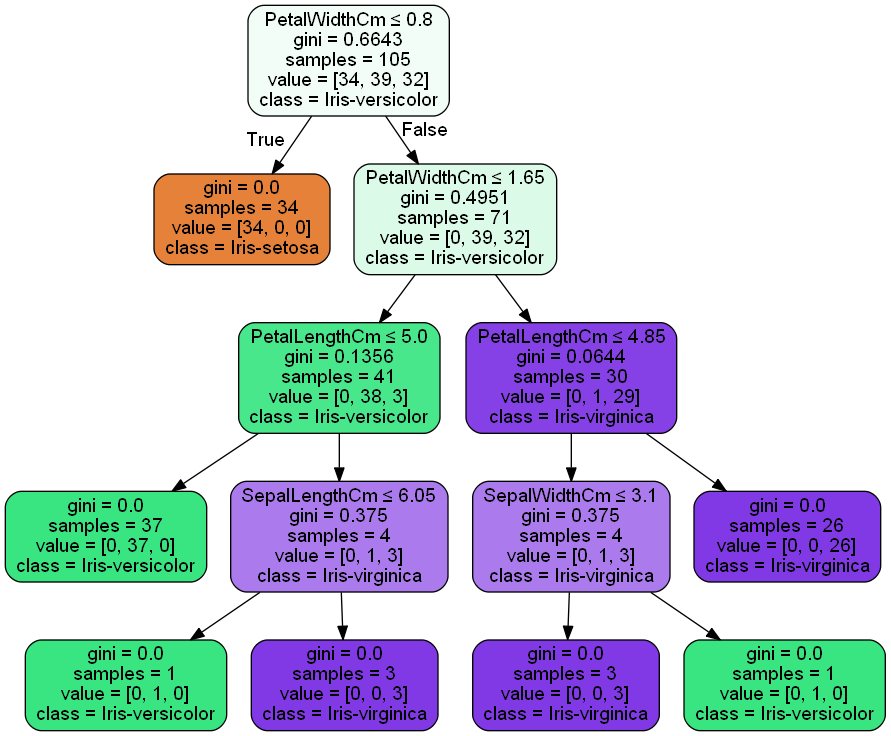

In [8]:
dot_data = export_graphviz(iris_tree, out_file=None, feature_names=feature_columns,  
                    class_names=class_labels,  filled=True, rounded=True,  special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

## Step 6 - Attributes importance

In [9]:
attr_importance = DataFrame()
attr_importance['feature'] = feature_columns
attr_importance['importance'] = iris_tree.feature_importances_
attr_importance.sort_values('importance', ascending=False)

,feature,importance
3,PetalWidthCm,0.892558
2,PetalLengthCm,0.064432
0,SepalLengthCm,0.021505
1,SepalWidthCm,0.021505


## Step 7 - Reduce decision tree complexity

In [10]:
## reference: http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier
simplified_iris_tree = DecisionTreeClassifier(max_depth=2, min_samples_split=5).fit(x_train, y_train)
y_pred_2 = simplified_iris_tree.predict(x_test)
'Simplified decision tree accuracy is ' + str(accuracy_score(y_test, y_pred_2))

'Simplified decision tree accuracy is 0.955555555556'

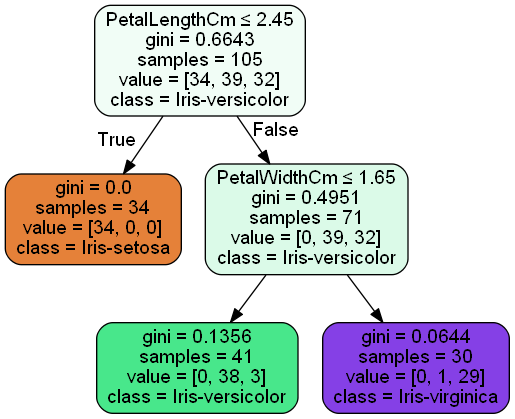

In [11]:
dot_data = export_graphviz(simplified_iris_tree, out_file=None, 
                    feature_names=feature_columns,  
                    class_names=class_labels,  
                    filled=True, rounded=True,  
                    special_characters=True)  

graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())